

##종목명. 대한항공



###**선정 이유**  
####1) 코로나 정점 이후 단계적인 일상 정상화로 인한 여행객 수 증가 예상  
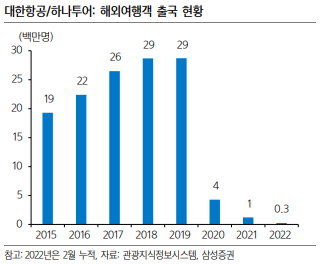  

####2) 화물 운임 강세에 따른 1분기 사상 최대 실적 예상

In [5]:
import os
import sys
import urllib.request
import datetime
import time
import json

client_id = '1UhrrmQpMJ2pgbX0fgh7'
client_secret = 'KPbm8Opp1r'


#[CODE 1]
def getRequestUrl(url):    
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)
    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

#[CODE 2]
def getNaverSearch(node, srcText, start, display):    
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)
    
    url = base + node + parameters    
    responseDecode = getRequestUrl(url)   #[CODE 1]
    
    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

#[CODE 3]
def getPostData(post, jsonResult, cnt):    
    title = post['title']
    description = post['description']
    org_link = post['originallink']
    link = post['link']
    
    pDate = datetime.datetime.strptime(post['pubDate'],  '%a, %d %b %Y %H:%M:%S +0900')
    pDate = pDate.strftime('%Y-%m-%d %H:%M:%S')
    
    jsonResult.append({'cnt':cnt, 'title':title, 'description': description, 
'org_link':org_link,   'link': org_link,   'pDate':pDate})
    return    

#[CODE 0]
def main():
    node = 'news'   # 크롤링 할 대상
    srcText = input('검색어를 입력하세요: ')
    cnt = 0
    jsonResult = []

    jsonResponse = getNaverSearch(node, srcText, 1, 100)  #[CODE 2]
    total = jsonResponse['total']
 
    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):         
        for post in jsonResponse['items']:
            cnt += 1
            getPostData(post, jsonResult, cnt)  #[CODE 3]       
        
        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = getNaverSearch(node, srcText, start, 100)  #[CODE 2]
       
    print('전체 검색 : %d 건' %total)
    
    with open('%s_naver_%s.json' % (srcText, node), 'w', encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)
                        
        outfile.write(jsonFile)
        
    print("가져온 데이터 : %d 건" %(cnt))
    print ('%s_naver_%s.json SAVED' % (srcText, node))
    
if __name__ == '__main__':
    main()

검색어를 입력하세요: 대한항공 주가
[2022-04-06 11:23:38.689584] Url Request Success
[2022-04-06 11:23:39.999263] Url Request Success
[2022-04-06 11:23:41.270005] Url Request Success
[2022-04-06 11:23:42.558467] Url Request Success
[2022-04-06 11:23:43.857955] Url Request Success
[2022-04-06 11:23:45.170222] Url Request Success
[2022-04-06 11:23:46.496439] Url Request Success
[2022-04-06 11:23:47.820846] Url Request Success
[2022-04-06 11:23:49.154664] Url Request Success
[2022-04-06 11:23:50.511942] Url Request Success
HTTP Error 400: Bad Request
[2022-04-06 11:23:51.462062] Error for URL : https://openapi.naver.com/v1/search/news.json?query=%EB%8C%80%ED%95%9C%ED%95%AD%EA%B3%B5%20%EC%A3%BC%EA%B0%80&start=1001&display=100
전체 검색 : 50665 건
가져온 데이터 : 1000 건
대한항공 주가_naver_news.json SAVED


In [10]:
def clean_html(x):
  x = re.sub("\&\w*\;","",x)
  x = re.sub("<.*?>","",x)
  return x

In [86]:
import pandas as pd
import re

news_df = pd.read_json('/content/대한항공 주가_naver_news.json')
news_df['title'] = news_df['title'].apply(lambda x: clean_html(x))
news_df['description'] = news_df['description'].apply(lambda x: clean_html(x))
news_df = news_df[['title','description','link','pDate']]
news_df.head(20)

,title,description,link,pDate
0,"대한항공, 여전히 높은 운임",© 베타뉴스 NH투자증권이 대한항공에 대해 투자 의견 매수와 목표 주가 4만3500...,http://www.betanews.net:8080/article/1324054.html,2022-04-06 20:20:00
1,"'고공행진' 리오프닝株, 공매도 암초 주의보",코로나19 방역 완화 기대감으로 상승 중인 리오프닝주가 공매도 난관에 부딪혔다. 리...,http://www.econovill.com/news/articleView.html...,2022-04-06 19:10:00
2,"코스피, 긴축 우려 속 0.88% 하락…외인 순매도 상위 종목은 삼성전자·SK하이...","외국인과 기관이 각각 3천585억원, 1천816억원 매도 우위를 보이며 삼성전자 주...",http://www.topstarnews.net/news/articleView.ht...,2022-04-06 17:54:00
3,'리오프닝'株가 뜬다!...특히 지금이 항공·레저주 살 때?,리오프닝(경제활동 재개) 관련 기업들의 주가가 뜨고 있다. '리오프닝'의 대표 수혜...,http://woman.chosun.com/news/articleView.html?...,2022-04-06 16:40:00
4,국제선 항공편 5월부터 대폭 증편…연말까지 코로나19이전 50% 수준으로,"대한항공 주가는 전거래일보다 200원(0.63%) 오른 3만2200원, 제주항공이 ...",http://www.insidevina.com/news/articleView.htm...,2022-04-06 16:36:00
5,"본격 리오프닝 온다… 호탤, 항공에 이어 카지노까지 상승세 이어갈까",코로나19 확진자 수가 감소세를 보이면서 오미크론 대유행이 정점을 지난 것으로 판단...,https://www.ajunews.com/view/20220406151326178,2022-04-06 16:22:00
6,대한항공 7거래일 연속 상승…실적 호조 기대감 작용,항공화물 증가 및 여행수요 회복에 따른 1분기 실적 호조 기대감이 최근 대한항공의 ...,http://www.finomy.com/news/articleView.html?id...,2022-04-06 16:14:00
7,'리오프닝' 기대감 떠오르며 항공주 꿈틀…지금이 매수 적기?,"이에 1일 진에어는 전날 대비 5.85% 올랐고, 제주항공(7.41%), 대한항공(...",http://news.tf.co.kr/read/economy/1929470.htm,2022-04-06 13:34:00
8,끝보이는 코로나19 대유행…항공·여행·주류 등 엔데믹 수혜주 '활짝',이 같은 소식에 이날 대한항공의 주가는 한때 전날보다 550원 오른 3만2550원까...,http://www.newsquest.co.kr/news/articleView.ht...,2022-04-06 11:20:00
9,"[특징주] 대한항공, 아시아나항공, 진에어 국제선 정상화 방침에 강세 시황","사실상 모든 국제 항공편 정상화 방침을 선언하면서 대한항공(+1.09% 32,300...",https://www.nbntv.co.kr/news/articleView.html?...,2022-04-06 10:34:00


###**키워드 설정**
###해외여행 / 항공화물 / 유가

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
%matplotlib inline

stock_df = pd.read_csv('/content/koreanAir.csv')

In [85]:
#x_date = stock_df['Date'].to_list()
#y_stock = stock_df['Close'].to_list()

x_date = np.array(stock_df['Date'])
y_stock = np.array(stock_df['Close'])

[Text(0, 0, '2021-12-15'),
 Text(0, 0, '2021-12-16'),
 Text(0, 0, '2021-12-17'),
 Text(0, 0, '2021-12-20'),
 Text(0, 0, '2021-12-21'),
 Text(0, 0, '2021-12-22'),
 Text(0, 0, '2021-12-23'),
 Text(0, 0, '2021-12-24'),
 Text(0, 0, '2021-12-27'),
 Text(0, 0, '2021-12-28'),
 Text(0, 0, '2021-12-29'),
 Text(0, 0, '2021-12-30'),
 Text(0, 0, '2022-01-04'),
 Text(0, 0, '2022-01-05'),
 Text(0, 0, '2022-01-06'),
 Text(0, 0, '2022-01-07'),
 Text(0, 0, '2022-01-10'),
 Text(0, 0, '2022-01-11'),
 Text(0, 0, '2022-01-12'),
 Text(0, 0, '2022-01-13'),
 Text(0, 0, '2022-01-14'),
 Text(0, 0, '2022-01-17'),
 Text(0, 0, '2022-01-18'),
 Text(0, 0, '2022-01-19'),
 Text(0, 0, '2022-01-20'),
 Text(0, 0, '2022-01-21'),
 Text(0, 0, '2022-01-24'),
 Text(0, 0, '2022-01-25'),
 Text(0, 0, '2022-01-26'),
 Text(0, 0, '2022-01-27'),
 Text(0, 0, '2022-01-28'),
 Text(0, 0, '2022-02-03'),
 Text(0, 0, '2022-02-04'),
 Text(0, 0, '2022-02-07'),
 Text(0, 0, '2022-02-08'),
 Text(0, 0, '2022-02-09'),
 Text(0, 0, '2022-02-10'),
 

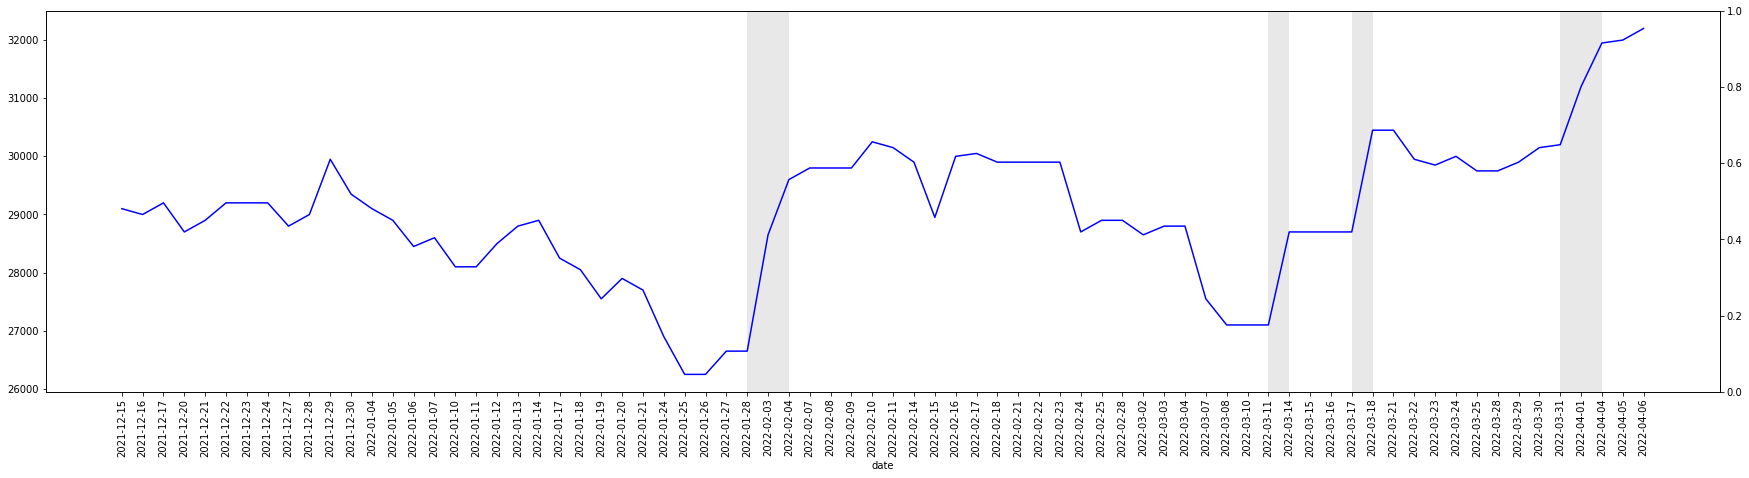

In [140]:
fig = plt.figure(figsize=(30, 7))

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax1.plot(x_date, y_stock, color='blue')
ax1.axvspan('2022-01-28', '2022-02-04',facecolor='lightgray', alpha=0.5)
ax1.axvspan('2022-03-17', '2022-03-18',facecolor='lightgray', alpha=0.5)
ax1.axvspan('2022-03-11', '2022-03-14',facecolor='lightgray', alpha=0.5)
ax1.axvspan('2022-03-31', '2022-04-04',facecolor='lightgray', alpha=0.5)


ax1.set_xlabel('date')
ax1.set_xticklabels(x_date, rotation = 90)

###01/28 - 02/04 : 화물수송으로 인한 지난해 영업익 최대

In [141]:
import requests
from bs4 import BeautifulSoup
import time

url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EB%8C%80%ED%95%9C%ED%95%AD%EA%B3%B5%20%EB%89%B4%EC%8A%A4&sort=0&photo=0&field=0&pd=3&ds=2022.01.26&de=2022.01.30&cluster_rank=21&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20220126to20220130,a:all&start=1'
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36',
          'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'lxml')

news_title = [title['title'] for title in soup.find_all('a', attrs={'class':'news_tit'})] # 기사 제목
news_url = [ url['href'] for url in soup.find_all('a', attrs={'class':'news_tit'}) ] # 기사 url

dates = [ date.get_text() for date in soup.find_all('span', attrs={'class':'info'})] # 기사 작성일
news_date = []
for date in dates:
    if re.search(r'\d+.\d+.\d+.', date) != None: # 기사 작성일 정제
        news_date.append(date)

result_df = pd.DataFrame()
df = pd.DataFrame({'기사작성일':news_date,'기사제목':news_title,'기사주소':news_url})
result_df = pd.concat([result_df, df], ignore_index=True)

result_df

,기사작성일,기사제목,기사주소
0,2022.01.29.,"'케이타 39득점' KB손해보험, 선두 대한항공 꺾고 3연패 탈출",https://news.sbs.co.kr/news/endPage.do?news_id...
1,2022.01.28.,"대한항공, 지난해 영업익 역대 최대",http://www.newsis.com/view/?id=NISI20220128_00...
2,2022.01.28.,원·달러 환율 1200원 뚫렸다…항공·철강업계 비상,http://www.ichannela.com/news/main/news_detail...
3,2022.01.27.,"대한항공, 지난해 영업익 1조4644억원···'역대 최대'",http://www.sisajournal-e.com/news/articleView....
4,2022.01.30.,"푹 쉰 케이타 39점…KB, 대한항공 꺾고 선두 추격",http://www.yonhapnewstv.co.kr/MYH2022013000210...
5,2022.01.28.,대한항공 화물수송으로 2021년 영업이익 사상최대,http://www.betanews.net:8080/article/1305665.html
6,2022.01.28.,개막전 경기 펼치는 포스코에너지와 대한항공,https://www.news1.kr/photos/view/?5193777
7,2022.01.29.,"KB손해보험, 선두 대한항공 잡고 3연패 탈출…손흥민 복귀 임박",http://news.tvchosun.com/site/data/html_dir/20...
8,2022.01.28.,"대한항공, 지난해 영업이익 1조4644억...전년비 515% 급증",https://www.ngetnews.com/news/articleView.html...
9,2022.01.27.,대한항공 화물 싣고 '훨훨'…영업익 1.4조 '사상 최대',http://www.newstomato.com/ReadNews.aspx?no=110...


###3/11 - 3/14 : 국제 유가 급락
(그 외 스포츠 등 복합적인 이유 존재할 것으로 보임)

In [147]:
url = 'https://search.naver.com/search.naver?where=news&query=%EB%8C%80%ED%95%9C%ED%95%AD%EA%B3%B5%20%EB%89%B4%EC%8A%A4&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds=2022.03.09&de=2022.03.12&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom20220309to20220312&is_sug_officeid=0'
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36',
          'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'lxml')

news_title = [title['title'] for title in soup.find_all('a', attrs={'class':'news_tit'})] 
news_url = [ url['href'] for url in soup.find_all('a', attrs={'class':'news_tit'}) ] 

dates = [ date.get_text() for date in soup.find_all('span', attrs={'class':'info'})] 
news_date = []
for date in dates:
    if re.search(r'\d+.\d+.\d+.', date) != None: 
        news_date.append(date)

result_df = pd.DataFrame()
df = pd.DataFrame({'기사작성일':news_date,'기사제목':news_title,'기사주소':news_url})
result_df = pd.concat([result_df, df], ignore_index=True)

result_df

,기사작성일,기사제목,기사주소
0,2022.03.09.,"대한항공, 임동혁 활약 한국전력에 역전승…4연승 질주",http://www.joongboo.com/news/articleView.html?...
1,2022.03.09.,"선두 대한항공, 한국전력에 3대 2 승리…4연승",https://news.sbs.co.kr/news/endPage.do?news_id...
2,2022.03.09.,러시아 직항편 2주간 결항…항공업계 ‘예의주시’,https://news.kbs.co.kr/news/view.do?ncd=541179...
3,2022.03.11.,"(영상)국제유가 급락에 '활짝' 웃은 여행·항공주…""지정학 리스크 주시""",http://www.newstomato.com/ReadNews.aspx?no=111...
4,2022.03.10.,"항공 정책, 윤석열 정부선 시장 친화적으로 선회할까",http://www.mediapen.com/news/view/706893
5,2022.03.11.,◇내일의 경기(12·13일)(종합),http://yna.kr/AKR20220310146651007?did=1195m
6,2022.03.11.,[기고] 통합 LCC 본사유치 성공의 필수 조건 /김재원,http://www.kookje.co.kr/news2011/asp/newsbody....
7,2022.03.10.,"KB손보, 외국인 빠진 현대캐피탈 제압…1위 맹추격",https://news.sbs.co.kr/news/endPage.do?news_id...
8,2022.03.10.,"골든블루, 타이완 위스키 '카발란' 기내 면세점 프로모션",https://www.nocutnews.co.kr/news/5721106
9,2022.03.10.,"[리그테이블] KB증권, 1~2월 'BBB급 이하 회사채 주관' 1위...2위 키움증권",http://www.thevaluenews.co.kr/news/view.php?id...


###3/17 - 3/18 : 유가 하락 

In [144]:
url = 'https://search.naver.com/search.naver?where=news&query=%EB%8C%80%ED%95%9C%ED%95%AD%EA%B3%B5%20%EB%89%B4%EC%8A%A4&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds=2022.03.15&de=2022.03.18&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom20220315to20220318&is_sug_officeid=0'
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36',
          'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'lxml')

news_title = [title['title'] for title in soup.find_all('a', attrs={'class':'news_tit'})] 
news_url = [ url['href'] for url in soup.find_all('a', attrs={'class':'news_tit'}) ] 

dates = [ date.get_text() for date in soup.find_all('span', attrs={'class':'info'})] 
news_date = []
for date in dates:
    if re.search(r'\d+.\d+.\d+.', date) != None: 
        news_date.append(date)

result_df = pd.DataFrame()
df = pd.DataFrame({'기사작성일':news_date,'기사제목':news_title,'기사주소':news_url})
result_df = pd.concat([result_df, df], ignore_index=True)

result_df

,기사작성일,기사제목,기사주소
0,2022.03.16.,1세트 따낸 대한항공,http://www.newsis.com/view/?id=NISI20220316_00...
1,2022.03.16.,"프로배구 선두 대한항공, 우리카드 잡고 6연승",https://news.sbs.co.kr/news/endPage.do?news_id...
2,2022.03.16.,[마감] 유가 하락에 항공주 '급등'...TS트릴리온 등 탈모주 안철수 위원장에 강세,https://www.asiatime.co.kr/article/20220316500369
3,2022.03.16.,"대한항공, 3대2로 승리",http://www.newsis.com/view/?id=NISI20220316_00...
4,2022.03.18.,[카드뉴스] 하반기 국제선 회복 기대에 치솟는 해외 항공권 가격,https://magazine.hankyung.com/business/article...
5,2022.03.16.,유가 진정에 여행·항공주 날았다(종합),http://www.smedaily.co.kr/news/articleView.htm...
6,2022.03.16.,결의 다지는 대한항공,http://www.newsis.com/view/?id=NISI20220316_00...
7,2022.03.15.,대한항공 4월 말까지 러시아행 운항 중단,http://www.enewstoday.co.kr/news/articleView.h...
8,2022.03.16.,[투자뉴스7] 유가 급락 & 中봉쇄 대한항공 · HMM 엇갈린 전략..왜?,https://news.mtn.co.kr/news-detail/20220316080...
9,2022.03.16.,"항공업계, 러시아 운항·영공 통과 중단…우회항로 이용",http://www.newsis.com/view/?id=NISI20220316_00...


###3/31 - 4/4 : 올해의 화물 항공사 선정 (= 화물 운임 강세)

In [146]:
url = 'https://search.naver.com/search.naver?where=news&query=%EB%8C%80%ED%95%9C%ED%95%AD%EA%B3%B5%20%EB%89%B4%EC%8A%A4&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds=2022.04.01&de=2022.03.18&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom20220318to20220401&is_sug_officeid=0'
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36',
          'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'lxml')

news_title = [title['title'] for title in soup.find_all('a', attrs={'class':'news_tit'})] 
news_url = [ url['href'] for url in soup.find_all('a', attrs={'class':'news_tit'}) ] 

result_df = pd.DataFrame()
df = pd.DataFrame({'기사제목':news_title,'기사주소':news_url})
result_df = pd.concat([result_df, df], ignore_index=True)

result_df

,기사제목,기사주소
0,"대한항공, '2022 ATW 올해의 화물 항공사' 선정",https://www.nocutnews.co.kr/news/5732867
1,"대한항공, '2022 ATW 올해의 화물 항공사' 선정",https://www.ngetnews.com/news/articleView.html...
2,"대한항공 노조 ""노동자 일자리 복귀 위해 PCR 검사 면제해야""",http://daily.hankooki.com/news/articleView.htm...
3,"대한항공, 1분기 화물운임 강세에 호실적 전망-NH",http://www.newstomato.com/ReadNews.aspx?no=111...
4,대한항공 브랜드가치 11위,http://www.newsis.com/view/?id=NISI20220331_00...
5,"대한항공, 15명 임원 승진…""아시아나 인수·통합 지원 초점""",http://news.einfomax.co.kr/news/articleView.ht...
6,"대한항공, 2022년 정기 임원인사…전무 4명, 상무 11명 승진",https://www.cnbnews.com/news/article.html?no=5...
7,"대한항공, 아시아나 주식 취득 또 미뤄…해외 결합 승인 지연 탓",http://www.mediapen.com/news/view/712481
8,티웨이항공 정홍근 세번째 임기...'장거리 경영' 박차,http://www.newstomato.com/ReadNews.aspx?no=111...
9,"대한항공, 4월 1일부로 임원인사 단행… 전무 4명, 상무 11명 등 총 15명 규...",http://www.cbci.co.kr/news/articleView.html?id...


###4/4 ~ 최근 : 해외여행 기대 / 국제선 운항 횟수 증편 예정
###=> 지속적인 상승세를 보이고 있음

In [149]:
url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=news&query=%EB%8C%80%ED%95%9C%ED%95%AD%EA%B3%B5+%EC%A3%BC%EA%B0%80&oquery=%EB%8C%80%ED%95%9C%ED%95%AD%EA%B3%B5&tqi=hC226wp0J1ZssEMDjMossssstyd-196978&nso=so%3Ar%2Cp%3Afrom20220404to20220406%2Ca%3Aall&de=2022.04.06&ds=2022.04.04&mynews=0&office_section_code=0&office_type=0&pd=3&photo=0&sort=0'
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36',
          'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'lxml')

news_title = [title['title'] for title in soup.find_all('a', attrs={'class':'news_tit'})] 
news_url = [ url['href'] for url in soup.find_all('a', attrs={'class':'news_tit'}) ] 

result_df = pd.DataFrame()
df = pd.DataFrame({'기사제목':news_title,'기사주소':news_url})
result_df = pd.concat([result_df, df], ignore_index=True)

result_df

,기사제목,기사주소
0,"대한항공, 화물부문 '탄탄'…1Q 실적 기대감-메리츠",http://www.edaily.co.kr/news/newspath.asp?news...
1,국제선 항공편 5월부터 대폭 증편…연말까지 코로나19이전 50% 수준으로,http://www.insidevina.com/news/articleView.htm...
2,항공株 신났다…유가 안정세에 ‘엔데믹’ 기대까지,https://www.mk.co.kr/economy/view/2022/301722
3,"이번 주 사실상 마지막 ‘사회적 거리 두기’ 시작…여행·항공·엔터주 살 때인가, 팔...",https://weekly.cnbnews.com/news/article.html?n...
4,[특징주] 국제선 운항 횟수 증편 소식에 항공주 강세,http://www.delighti.co.kr/news/articleView.htm...
5,'리오프닝' 기대감 떠오르며 항공주 꿈틀…지금이 매수 적기?,http://news.tf.co.kr/read/economy/1929470.htm
6,코스피 2750선 상승 마감…항공株 강세 부각,https://www.hankyung.com/finance/article/20220...
7,대한항공 7거래일 연속 상승…실적 호조 기대감 작용,http://www.finomy.com/news/articleView.html?id...
8,[특징주] 리오프닝 기대·유가 하락에 항공주 강세,http://yna.kr/AKR20220404039400002?did=1195m
9,올 여름 휴가는 하와이로?… 해외여행 기대감에 항공株 '비상',http://moneys.mt.co.kr/news/mwView.php?no=2022...
